# Variedade de *Landforms*

## Importando pacotes e inicializando *geemap*

In [13]:
import os
import ee
import geemap
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [16]:
geemap.ee_initialize()

### Variedade de *landforms*

### *Landforms*

Nós exploramos três metodologias de classificação de *landforms* (Anderson *et al.* 2016; Theobald *et al.* 2015; Iwahashi & Yamazaki 2022) para definirmos quais delas seriam usadas no cálculo da variedade de *landforms*. Primeiro, nós classificamos as *landforms* como Anderson *et al*. (2016), exceto a *landform* ***Flat at the bottom of steep slope***. Assim, nossas *landforms* foram:

* **3 - Cool Steep Slope**
* **4 - Warms Steep Slope**
* **5 - Cliff**
* **11 - Summit/Ridgetop**
* **13 - Slope Crest**
* **21 - Flat Hilltop**
* **22 - Gentle Slope Hilltop**
* **23 - Cool Sideslope**
* **24 - Warm Sideslope**
* **30 - Dry Flats**
* **32 - Valley/Toeslope**
* **39 - Moist Flats**
* **43 - Cool Footslope**
* **44 - Warm Sideslope**

### Variáveis classificadoras das *landforms*

Nós classificamos as *landforms* pela **inclinação do relevo** (*slope*), **aspecto** (*aspect*), **Índice de Posição Topográfica** (*TPI*) e **Índice de Umidade** (*moisture index*). As variáveis foram discretizadas em classes e combinadas para comporem os tipos de *landforms*. As *landforms* são classificadas principalmente pelo *slope* e TPI (Figure 1). O *aspect* classifica as faces *quentes* ou *frias* do relevo e o *moisture index* classifica as áreas planas em secas ou úmidas.    

![](./landforms.png)

    Figura 1. Classificação de landforms pela The Nature Conservancy para as paisagens na América do Norte.Adaptação de Anderson et al. (2016).
    

Cada variável foi discretizada em classes para comporem os tipos de *landforms*. Os limiares (Tabela 1) para a discretização foram definidos por ajustes visuais que melhor representavam as *landforms*. 


               Tabela 1. Descrição dos limiares de classificação de cada variável em classes.
| Variáveis | Classes | Limiar inferior | Limiar superior |
|:-:|:-:|:-:|:-:|
| Inclinação do relevo|1|-1|2|
|Inclinação do relevo|2|2|6|
|Inclinação do relevo|3|6|24|
|Inclinação do relevo|4|24|35|
|Inclinação do relevo|5|35|90|
|TPI|1|-Inf|-15|
|TPI|2|-15|-1|
|TPI|3|-1|30|
|TPI|4|30|975|
|TPI|5|975|Inf|
|Aspecto|2|0|90|
|Aspecto|1|90|270|
|Aspecto|2|270|360|
|Índice de Umidade|0|-Inf|30000|
|Índice de Umidade|1|3000|Inf|




Em seguida, as classes foram combinadas pela soma de cada classe multiplicada por um peso. O *moisture index* foi multiplicado por 1000, *aspect* por 100, TPI por 10 e *slope* por 1. Desta forma, o número resultante representa um código descrevendo as classes de cada variável. Por exemplo, 1231 é a classe 1 de *moisture index*, 2 de *aspect*, 3 de TPI e 1 de *slope*. Posteriormente, os valores finais foram convertidos em tipos de *landforms*, seguindo a Tabela 2.

    Tabela 2. Critério de conversão dos códigos da combinação de classes em tipos de landforms.
    
|Código|Tipos de *landforms*|
|:-:|:-:|
|11|11|
|12|11|
|13|13|
|14|11|
|15|5|
|20|21|
|21|21|
|22|22|
|23|24|
|24|24|
|25|5|
|31|30|
|32|32|
|33|24|
|34|24|
|35|5|
|40|32|
|41|32|
|42|32|
|43|43|
|44|3|
|45|5|
|51|51|
|111|11|
|112|11|
|113|13|
|114|3|
|115|5|
|121|21|
|122|22|
|123|23|
|124|3|
|125|5|
|131|30|
|132|32|
|133|23|
|134|3|
|135|5|
|141|32|
|142|32|
|143|43|
|144|3|
|145|5|
|151|51|
|211|11|
|212|11|
|213|13|
|214|4|
|215|5|
|221|21|
|222|22|
|223|24|
|224|4|
|225|5|
|231|30|
|232|32|
|233|24|
|234|4|
|235|5|
|241|32|
|242|32|
|243|44|
|244|4|
|245|5|
|251|51|
|1000|39| 

## Bases de dados

Nós utilizamos para a classificação das *landforms* o Modelo Digital de Elevação (DEM) do Merit-DEM (Yamazaki *et al.* 2017), o acúmulo de fluxo do Merit-Hydro (Yamazaki *et al.* 2019) e a camada de uso do solo do MapBiomas (MapBiomas Project 2020). O Modelo Digital de Elevação possui uma resolução de 90 metros e foi escolhido por ser um produto global ao combinar dados dos satélites do *Shuttle Radar Topography Mission* (SRTM) (Farr *et al*. 2007) e *Advanced Land Observing Satellite* (ALOS) (Tadono *et al*. 2015), permitindo a replicabilidade da metodologia em outras regiões. O Merit-DEM corrige viéses de Modelo Digitais de Elevação gerados por imagens de satétite como *speckle noise*, *stripe noise*, *absolute bias* e *tree height bias* (Yamazaki *et al.* 2017). A correção de *tree height bias* é principalmente importante para a Floresta Amazônica devido a sua densidade de árvores altas. Além disso, há um produto derivado, o Merit-Hydro, que disponibiliza o acúmulo de fluxo global, que demandaria grande esforço computacional para ser calculado para todo o Brasil. O Merit-Hydro corrige os efeitos de densidade de árvores no cálculo da rede dendrítica, o que é importante para a Amazônia.

Nós incluímos as classes de água do MapBiomas para complementar a superfície gerada pelo acúmulo de fluxo na definição de áreas planas úmidas. O MapBiomas é um projeto nacional de mapeamento e classificação de mudanças do uso do solo dos últimos 30 anos a partir de dados de sensoriamento remoto. 

## Códigos para a criação da variedade de *landforms*

Nossas análises foram rodadas no *Google Earth Engine* (Gorelick 2017), devido a demanda computacional do projeto, usando o pacote *geemap* (Wu 2020) em *Python* (Python Software Foundation 2023) como interface pela facilidade na documentação e reproditividade das análises. 

### Inclinação do relevo (*slope*)

Nós criamos a superfície de *slope* a partir do Merit-DEM.

In [17]:
# Importando Modelo Digital de Elevação

DEM = ee.Image("MERIT/DEM/v1_0_3") 

# Calculando o slope

slope = ee.Terrain.slope(DEM)

### Aspecto (*aspect*)

Nós calculamos o *aspect* do relevo utilizando o mesmo DEM.

In [18]:
aspect = ee.Terrain.aspect(DEM)

### Índice de Posição Topográfica (TPI)

Nós calculamos o Índice de Posição Topográfica (TPI)(Weiss 2001) para cada célula do *raster* dentro de um *kernel* circular com 7, 11 e 15 células de raio. O TPI é a diferença média de elevação entre a célula focal e um conjunto de células vizinhas.

$TPI = \frac{\sum_{i}^{n}(vizinhança_i -  focal)}{n}$

a vizinhança *i* representa cada uma das *n* células dentro do *kernel* da célula focal. O índice final é composto pela média de TPI das três janelas, o que permite a consideração de diferentes níveis de resolução da paisagem, tanto local quanto regional (Theobald *et al*. 2015). Os tamanhos das janelas foram definidos visualmente para que melhor representassem as *landforms*, principalmente os *Summits*, *Valleys*, *Toeslopes* e *Hilltops* (*flat* e *gentle*). Os tamanhos das janelas também tinham que capturar os Platôs como *Summits*. 


In [19]:
# Função para calcular o TPI

def calculate_TPI(pixel_size):

  # Calcule a média das células da vizinhança

  focal_mean = DEM.focalMean(**{
                       'radius': pixel_size,
                       'kernelType': "circle",
                       'units': "pixels"
                     })

  # Calcule a diferença entre a ćelula focal e média da região 

  TPI = focal_mean.subtract(DEM)

  return TPI


In [20]:
# Tamanho das janelas 

window_size = [7,11,15]

# Calculo do TPI para cada janela e calculo do TPI médio das janelas

TPI = ee.ImageCollection(list(map(calculate_TPI, window_size))).toBands().reduce("mean")

### Índice de Umidade (*Moisture index*)

Nós calculamos o *moisture index* (Anderson *et al*. 2016) baseado no acúmulo de fluxo presente no Merit-Hydro (Yamazaki *et al.* 2019), na camada **upg**, que é calculado sobre o Merit-DEM. O *moisture index* é calculado da seguinte forma:

$moisture.index = \frac{\log(fluxo + 1)}{(slope + 1)} \times 1000$

onde fluxo é o acúmulo de fluxo e *slope* é o *slope* calculado anteriormente. O *moisture index* é a média do índice dentro de um *kernel* circular de uma célula de raio. O tamanho do raio foi escolhido visualmente para suavizar o índice, mas representando bem a distribuição dos cursos d'água.

In [21]:
# Importando o acúmulo de fluxo

flow_accumulation = ee.Image("MERIT/Hydro/v1_0_1").select("upg")

# Calculando o moisture index

moisture_index = (
    flow_accumulation
    .add(ee.Number(1))
    .divide(slope.add(ee.Number(1)))
    .log()
    .multiply(1000)
    .focalMean(**{'radius': 1,
                  'kernelType': "circle",
                  'units': "pixels"
                  }
                )
)

### Convertendo variáveis em classes

### Inclinação do relevo (*slope*)

As variáveis foram convertidas em classes utilizando a Tabela 1, seguindo Anderson *et al*. (2016). As classes de slope foram criadas com o seguinte código:

In [22]:
slope_classes = (
    slope
    .where(slope.gte(-1).And(slope.lte(2)), 1)
    .where(slope.gt(2).And(slope.lte(6)), 2)
    .where(slope.gt(6).And(slope.lte(24)), 3)
    .where(slope.gt(24).And(slope.lte(35)), 4)
    .where(slope.gt(35).And(slope.lte(90)), 5)
)

### Aspecto (*aspect*)

O aspecto foi escolhido para definir as faces norte e sul do relevo no hemisfério sul.

In [23]:
aspect_classes = (
    aspect
    .where(aspect.gte(0).And(aspect.lte(90)), 2)
    .where(aspect.gt(90).And(aspect.lte(270)), 1)
    .where(aspect.gt(270).And(aspect.lte(360)), 2)
)

### Índice de Posição do Relevo (TPI)

As classes de TPI foram definidas para representarem bem os *Summits*, *Valleys*, *Toeslopes* e *Hilltops*, que foram as *landforms* mais difíceis de ajustar os parâmetros.

In [24]:
TPI_classes = (
    TPI
    .where(TPI.lte(-15), 1)
    .where(TPI.gt(-15).And(TPI.lt(-1)), 2)
    .where(TPI.gte(-1).And(TPI.lte(30)), 3)
    .where(TPI.gt(30).And(TPI.lte(975)), 4)
    .where(TPI.gt(975), 5)
)

### Índice de Umidade (*moisture index*)

O limiar do índice umidade para classificar as áreas como umidas ou secas foram definidos visualmente para capturarem a distribuição dos cursos d'água sem criar áreas planas secas com excesso de ramificações dendríticas. Grandes rios (ex. Rio Amazonas, represas e lagos) não foram bem representados pelo *moisture index*, pois classificava somente a partes mais profundas como áreas úmidas, mantendo o restante dos grandes corpos d'água como regiões planas secas. Nós corrigimos essa classificação combinando a área úmidade classificada pelo acúmulo de fluxo com a camada de águas produzida pelo MapBiomas.

In [25]:
# Classificando o índice de umidade em classes

moisture_classes = (
    moisture_index.where(moisture_index.lte(3000), 0)
    .where(moisture_index.gt(3000), 1)
)

# Importando o dado de uso de solo do Mapbiomas e reprojetando para a escala do DEM

mapbiomas  = (
    ee.Image("projects/mapbiomas-workspace/public/collection7/mapbiomas_collection70_integration_v2")
    .select("classification_2020")
    .reproject('EPSG:4326', None, 92.76624)
)

# Reclassificando o raster do MapBiomas em água (1) e outras classes (0)

water = (
    mapbiomas
    .where(mapbiomas.eq(33), 1)
    .where(mapbiomas.neq(33), 0)
)

# Combinado o índice de umidade com a camada de água e reclassificando

moisture_classes = moisture_classes.add(water)

moisture_classes = (
    moisture_classes
    .where(moisture_classes.gte(1), 1)
    .where(moisture_classes.lt(1), 0)
)

### Combinando as classes

Combinamos as classes para a geração de um código representativo de cada variável. O *moisture index* foi multiplicado por 1000, *aspect* por 100, TPI por 10 e *slope* por 1.  

In [26]:
classes_collection = ee.Image([moisture_classes.multiply(ee.Number(1000)),
                                   aspect_classes.multiply(ee.Number(100)),
                                   TPI_classes.multiply(ee.Number(10)),
                                   slope_classes])

landform_combination = classes_collection.reduce(ee.Reducer.sum())

### Classificando os tipos de *landforms*

Classificamos os tipos de *landforms* pelo código gerado anteriormente e ajustamos visualmente alguns códigos para representarem bem as *landforms*. Por exemplo, o código 11 representa áreas de baixa inclinação do relevo e uma posição do relevo mais alta que o entorno, sendo portanto um topo de montanha (*Summit*). No entanto, alguns códigos tiveram que ser bem inspecionados para separar alguns tipos de *landforms* como *Sideslopes* de *Valleys* e *Toeslopes*. 

In [27]:
landform_types = (
    landform_combination
    .mask(landform_combination.gt(0))
    .where(landform_combination.eq(11), 11)
    .where(landform_combination.eq(12), 11)
    .where(landform_combination.eq(13), 13)
    .where(landform_combination.eq(14), 11)
    .where(landform_combination.eq(15), 5)
    .where(landform_combination.eq(20), 21)
    .where(landform_combination.eq(21), 21)
    .where(landform_combination.eq(22), 22)
    .where(landform_combination.eq(23), 24)
    .where(landform_combination.eq(24), 24)
    .where(landform_combination.eq(25), 5)
    .where(landform_combination.eq(31), 30)
    .where(landform_combination.eq(32), 32)
    .where(landform_combination.eq(33), 24)
    .where(landform_combination.eq(34), 24)
    .where(landform_combination.eq(35), 5)
    .where(landform_combination.eq(40), 32)
    .where(landform_combination.eq(41), 32)
    .where(landform_combination.eq(42), 32)
    .where(landform_combination.eq(43), 43)
    .where(landform_combination.eq(44), 3)
    .where(landform_combination.eq(45), 5)
    .where(landform_combination.eq(51), 51)
    .where(landform_combination.eq(111), 11)
    .where(landform_combination.eq(112), 11)
    .where(landform_combination.eq(113), 13)
    .where(landform_combination.eq(114), 3)
    .where(landform_combination.eq(115), 5)
    .where(landform_combination.eq(121), 21)
    .where(landform_combination.eq(122), 22)
    .where(landform_combination.eq(123), 23)
    .where(landform_combination.eq(124), 3)
    .where(landform_combination.eq(125), 5)
    .where(landform_combination.eq(131), 30)
    .where(landform_combination.eq(132), 32)
    .where(landform_combination.eq(133), 23)
    .where(landform_combination.eq(134), 3)
    .where(landform_combination.eq(135), 5)
    .where(landform_combination.eq(141), 32)
    .where(landform_combination.eq(142), 32)
    .where(landform_combination.eq(143), 43)
    .where(landform_combination.eq(144), 3)
    .where(landform_combination.eq(145), 5)
    .where(landform_combination.eq(151), 51)
    .where(landform_combination.eq(211), 11)
    .where(landform_combination.eq(212), 11)
    .where(landform_combination.eq(213), 13)
    .where(landform_combination.eq(214), 4)
    .where(landform_combination.eq(215), 5)
    .where(landform_combination.eq(221), 21)
    .where(landform_combination.eq(222), 22)
    .where(landform_combination.eq(223), 24)
    .where(landform_combination.eq(224), 4)
    .where(landform_combination.eq(225), 5)
    .where(landform_combination.eq(231), 30)
    .where(landform_combination.eq(232), 32)
    .where(landform_combination.eq(233), 24)
    .where(landform_combination.eq(234), 4)
    .where(landform_combination.eq(235), 5)
    .where(landform_combination.eq(241), 32)
    .where(landform_combination.eq(242), 32)
    .where(landform_combination.eq(243), 44)
    .where(landform_combination.eq(244), 4)
    .where(landform_combination.eq(245), 5)
    .where(landform_combination.eq(251), 51)
    .where(landform_combination.gte(1000), 39)
)

### Exportando mapas para assets

In [28]:
# Nome do asset
assetId = "projects/ee-lucasljardim9/assets/landform_types"

# Importando mapa de biomas do IBGE para extrair as coordenadas mínimas e máximas do Brasil
bioma = ee.FeatureCollection("projects/ee-lucasljardim9/assets/Biome")

def func_cmp(feature):
    return feature.bounds() 

# Extraindo as coordenadas mínimas e máximas do Brasil
bioma_box = bioma.map(func_cmp).geometry().dissolve(**{'maxError': 1}).bounds()

# Extraindo a resolução do mapa
escala = landform_types.projection().nominalScale()

In [29]:
# Exportando para o gee
geemap.ee_export_image_to_asset(
    landform_types, description='landform_types', assetId=assetId, region=bioma_box, scale=escala,maxPixels=1e13
)

### Exemplo de *landforms*

Abaixo está uma representação das *landforms* na região de Alto Paraíso de Goiás-GO (Latitude:-14.11, Longitude:-47.26).

In [30]:
%%capture --no-display

# Delimitando a região
regiao = ee.Geometry.BBox(-47.4631, -13.9777, -47.1005, -14.1711)

# Creando a pasta para exportar as figuras
if not os.path.exists("figura"):
    
    os.mkdir("figura")

# Exportando a imagem da região
geemap.ee_export_image(
    landform_types, filename="figura/landform_types.tif", scale=escala, region=regiao, file_per_band=False
)

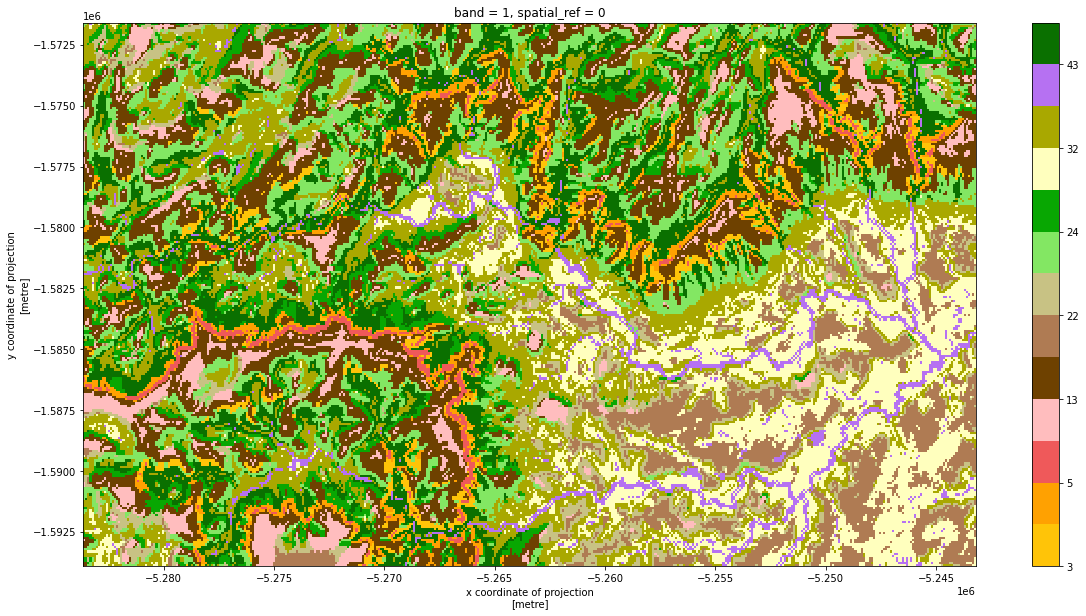

In [31]:
# Paleta de cores das landforms
palette = [
    "#ffc408", # 3
    "#ffa101", # 4
    "#ef595a", # 5
    "#ffbdbe", # 11
    "#6e4100", # 13
    "#af7b53", # 21
    "#c8f6ad", # 23
    "#c8c284", # 22
    "#83e763", # 24
    "#08a702", # 43
    "#ffffbe", # 30
    "#a9a800", # 32
    "#b671f2", # 39
    "#0a7000" ] # 44

# Discretinzando a paleta de cores
cmap = ListedColormap(
   palette, 'Custom cmap')

class_bins = [3, 4, 5, 11, 13, 21, 22, 23, 24, 30, 32, 39, 43, 45]

norm = BoundaryNorm(class_bins, 
                    13)

# Plotando mapa 
geemap.plot_raster("figura/landform_types.tif", cmap = cmap, norm = norm, figsize = [20, 10])

          Figura 2. Landforms classificadas na região de Alto Paraíso de Goiás-GO, Brasil.

## Calculando a variedade de *landforms*

A variedade de *landforms* foi calculada como a soma de tipos diferentes de *landforms* dentro de um *kernel* circular de uma célula focal. O tamanho do raio do *kernel* foi definido calculando a variedade em diferentes raios (2, 5, 7, 10, 15, 20 células) e calculando o ganho de variedade a cada aumento de raio. O raio escolhido foi aquele que o subsequente não adicionou variedade. Desta forma, o raio representa o nível de resolução da paisagem que captura o máximo de variedade de *landforms*. Raios maiores podem aumentar a variedade, mas devido a mudança de paisagem. Assim, o raio escolhido foi de 5 células de raio (450 metros) para todo o Brasil. Abaixo está uma representação da variedade de *landforms* para a mesma região de Alto Paraíso de Goiás-GO.

In [32]:
radius_pixels = 5

landform_variety = (
    landform_types
    .neighborhoodToBands(ee.Kernel.circle(radius_pixels))
    .reduce(ee.Reducer.countDistinct())
)

In [33]:
%%capture --no-display

geemap.ee_export_image(
    landform_variety, filename="figura/landform_variety.tif", scale=escala, region=regiao, file_per_band=False
)

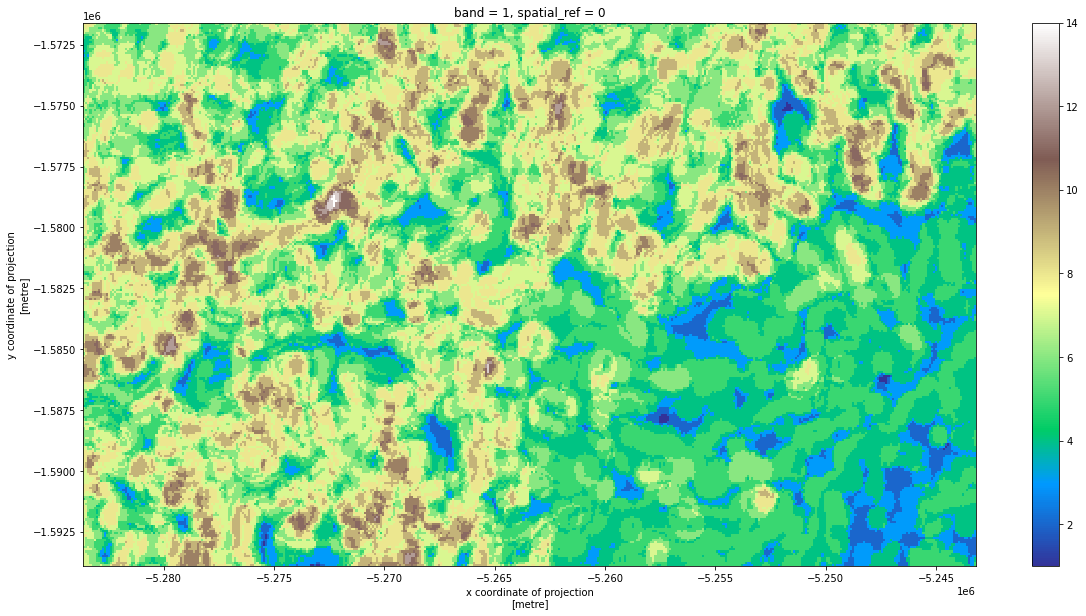

In [34]:
geemap.plot_raster("figura/landform_variety.tif", figsize = [20, 10])

            Figura 3. Variedade de landforms para região de Alto Paraíso de Goiás-GO, Brasil.

In [35]:
assetId = "projects/ee-lucasljardim9/assets/landform_variety"

geemap.ee_export_image_to_asset(
    landform_variety, description='landform_variety', 
    assetId=assetId, 
    region=bioma, 
    scale=escala,maxPixels=1e13
)

## Bibliografia

Anderson, M.G., Barnett, A., Clark, M., Ferree, C., Sheldon, A.O., Prince, J. 2016. Resilient Sites for Terrestrial Conservation in Eastern North America. The Nature Conservancy. http://easterndivision.s3.amazonaws.com/Resilient_Sites_for_Terrestrial_Conservation.pdf.  

Farr, T.G., et al. 2007. The shuttle radar topography mission. Reviews of Geophysics, 45, 2, RG2004, doi:10.1029/2005RG000183.  

Theobald, D.M., Harrison-Atlas, D., Monahan, W.B., Albano, C.M. 2015. Ecologically-relevant maps of landforms and physiographic diversity for climate adaptation planning. Plos One, 12, 1-17, doi:10.1371/journal.pone.0143619. 

Yamazaki et al. 2017

Yamazaki et al. 2019

Iwahashi & Yamazaki 2022

Souza et al. 2020

Tadono et al. 2015

Google Earth

geemap

Python

Weiss, A.D., 2001. Topographic position and landforms analysis. Poster Presentation,
ESRI Users Conference, San Diego, CA